In [1]:
#This notebook was created by Prisha Jain

In [2]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from astropy.utils.data import download_file
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

In [3]:
#opening the fits file
hdul = fits.open('C:/Users/prish/Downloads/emm_exi_l2a_20210506T003638_0049_xos1_f635_r_v04-01.fits.gz') #enter the file path to be opened here

In [4]:
hdul.close()
hdul.info()

Filename: C:/Users/prish/Downloads/emm_exi_l2a_20210506T003638_0049_xos1_f635_r_v04-01.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      95   ()      
  1  SCI           1 ImageHDU        15   (2048, 1536)   int16 (rescales to float32)   


In [5]:
im_info = hdul[0].header
print(repr(im_info))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'CU/LASP EMM/EXI ITF'                                                 
TELESCOP= 'EMM     '                                                            
INSTRUME= 'EXI     '                                                            
FILENAME= 'emm_exi_l1_20210506T003638_0049_xos1_f635_r_v04-01'                  
DATE    = '2022-01-09T05:59:47.84' / File processing time                       
PIPE_VER= '1.3     '                                                            
DATE-OBS= '2021-05-06T00:36:38.70' / Observation UTC SCET                       
XPOSURE =        0.00611841997 / [s] Exposure Time                              
DETECTOR= 'VI      '        

In [6]:
image = fits.getdata('C:/Users/prish/Downloads/emm_exi_l2a_20210506T003638_0049_xos1_f635_r_v04-01.fits.gz', ext=1)

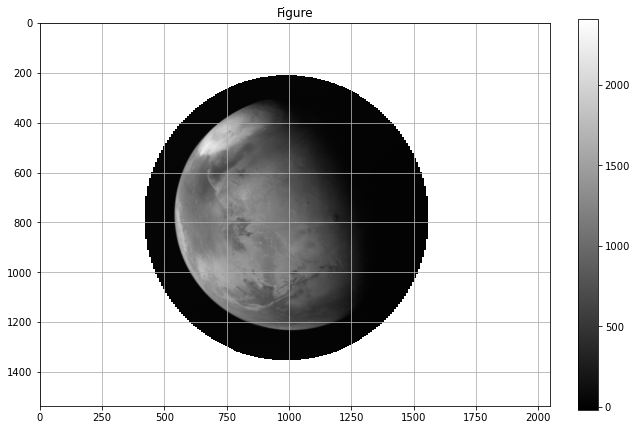

In [7]:
plt_title_str = ('C:/Users/prish/Downloads/emm_exi_l2a_20210506T003638_0049_xos1_f635_r_v04-01.fits.gz'.split('/')[-1]).split('.')[0]
demo_image = plt.figure(figsize=(10,10))
plt.imshow(image, plt.cm.gray)
plt.title('Figure')
plt.colorbar(fraction=0.035)
plt.grid()
plt.show()

In [8]:
z_size = 600 #the number of pixels you want around (size)
z_center = [1000, 400] #image coordinates you want to zoom around 

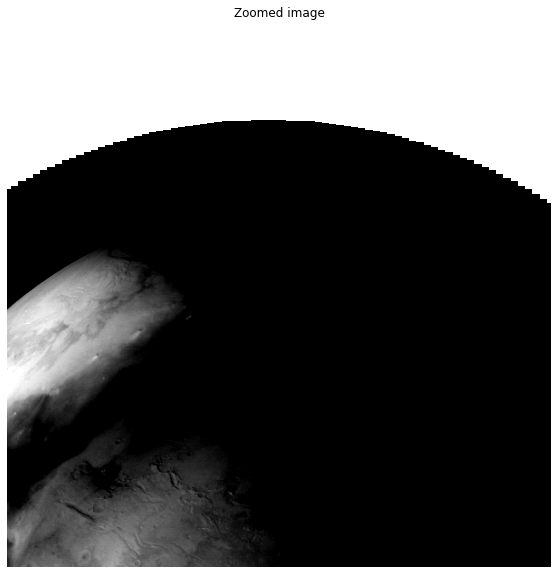

In [9]:
#to plot the zoomed image
zoom_demo_image = plt.figure(figsize=(10,10))
plt.imshow(
np.sqrt(np.abs(image[z_center[1]-int(z_size/2):z_center[1]+int(z_size/2), z_center[0]-int(z_size/2):z_center[0]+int(z_size/2)])),plt.cm.gray, vmin=30, vmax=45)
plt.axis('off')
plt.title('Zoomed image')
plt.show()

In [10]:
#importing more libraries
import pylab as py
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
import numpy as np
import cv2

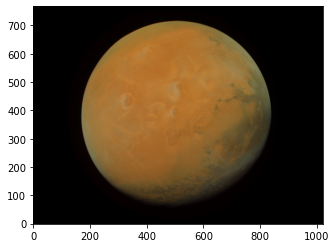

In [11]:
from skimage.transform import resize

r_name = fits.open(r"C:\Users\prish\Downloads\emm_exi_l2a_20210830T083249_0100_xos1_f635_r_v04-01.fits.gz")
g_name = fits.open(r"C:\Users\prish\Downloads\emm_exi_l2a_20210830T083306_0100_xos1_f546_r_v04-01.fits.gz")
b_name = fits.open(r"C:\Users\prish\Downloads\emm_exi_l2a_20210830T083317_0100_xos1_f437_r_v04-01.fits.gz")
r = r_name[1].data
g = g_name[1].data
b = b_name[1].data
r = resize(r, (g.shape[0], g.shape[1])) 
rgb_default = make_lupton_rgb(r*1,g*0.95,b*0.8,Q=4,stretch=1700)
plt.imshow(rgb_default, origin='lower')

In [12]:
from PIL import Image as im

In [13]:
image1 = im.fromarray(rgb_default)

In [14]:
image1.save("C:/Users/prish/Desktop/Mars_images/30Aug_xos1_1137.jpg") #enter the path of the location where you wish to save the image

In [15]:
import glob
from PIL import Image as im
def make_gif(frame_folder):
    frames = [im.open(image) for image in glob.glob(f"{frame_folder}/*.JPG")]
    frame_one = frames[0]
    frame_one.save("24mayxos1.gif", format="GIF", append_images=frames,
               save_all=True, duration=400, loop=0)
    
if __name__ == "__main__":
    make_gif(r"C:\Users\prish\Desktop\24 May\images")#enter the location where the images are saved out of which you wish to create the animation.